In [1]:
import numpy as np
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute

from qiskit.visualization import plot_histogram

In [12]:
def dj_oracle(case, n):
    oracle_qc = QuantumCircuit(n+1)
    if case == "balanced":
        b = np.random.randint(1, 1<<n)
        b_str = format(b, '0'+str(n)+'b')
        for i, s in enumerate(b_str):
            if s == "1":
                oracle_qc.x(i)
        for i in range(n):
            oracle_qc.cx(i, n)
        for i, s in enumerate(b_str):
            if s == "1":
                oracle_qc.x(i)
    elif case == "constant":
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_qc.name = "Oracle"
    return oracle_gate

In [17]:
def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    for qubit in range(n):
        dj_circuit.h(qubit)
    dj_circuit.x(n)
    dj_circuit.h(n)
    dj_circuit.append(oracle, range(n+1))
    dj_circuit.h(range(n))
    dj_circuit.measure(range(n), range(n))
    return dj_circuit


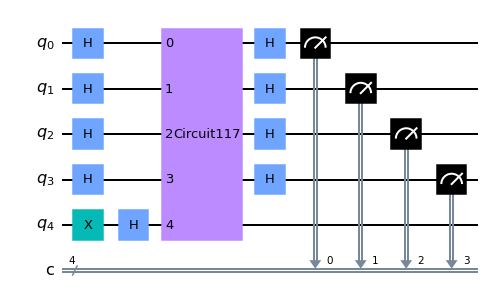

In [22]:
n = 4
oracle_gate = dj_oracle('balanced', n)
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw(output="mpl")

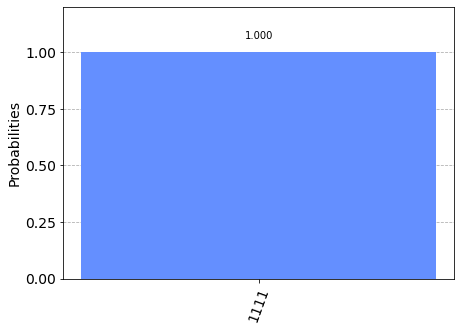

In [23]:
backend = BasicAer.get_backend('qasm_simulator')
results = execute(dj_circuit, backend=backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)